In [25]:
import pandas as pd

### Part A: Data Cleaning & Exploratory Analysis

In [26]:
#Import full data set using Pandas:
data = pd.read_csv("bottle.csv")
data.shape

(864863, 74)

In [32]:
#Limit the dataset to the following columns: [T_degC, Salnty, STheta] and then remove all NaN and NA values (Hint: Pandas has a method for this) .
#list(data.columns)
df=data[['T_degC', 'Salnty', 'STheta']]
df=df.dropna()
df.shape

(812174, 3)

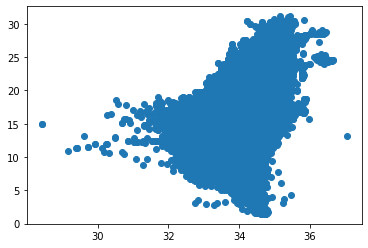

In [35]:
# Build the following plots using matplotlib:
# a) Scatter: Salnty (salinity of water) vs T_degC


import matplotlib.pyplot as plt
plt.scatter(df['Salnty'],df['T_degC'])
plt.show()

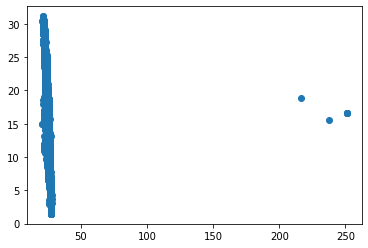

In [36]:
# b) Scatter: STheta (density of water) vs T_degC
plt.scatter(df['STheta'],df['T_degC'])
plt.show()

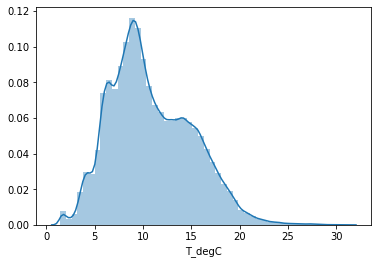

In [37]:
# Build the following plot using seaborn: 
# a) Distribution of T_degC (hint: distplot will be helpful here)

import seaborn as sns
sns.distplot(df['T_degC'])

In [47]:
# Remove obvious outliers from step 3b:
#  Shape for clean data will be: (812168, 3)
# Hint: Just looking to remove extreme STheta values - please post on Canvas if struggling with this section. 
df=df[df['STheta']<150]
df.shape

(812168, 3)

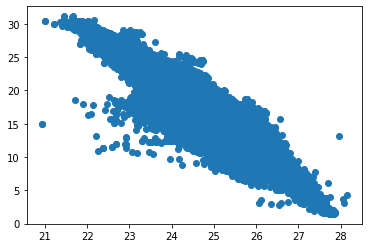

In [48]:
#Plot 3b again – does it look better? Explain!
plt.scatter(df['STheta'],df['T_degC'])
plt.show()

#After remove the outlier, it does looks better since the scale of the x-axis changed after remove the outliers.

### Part B: Train & Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df[['Salnty','STheta']], df['T_degC'], test_size = 0.2, random_state = 101)


In [100]:
X_train.shape

(649734, 2)

In [64]:
X_test.shape

(162434, 2)

In [65]:
y_train.shape

(649734,)

In [66]:
y_test.shape

(162434,)

### Part C: Linear Regression Using Normal Equation - Coded In Python


In [74]:
# Build the normal equation using numpy & fit using your training data (X_train & y_train).
# Note: Make sure to include an intercept value of 1 for every observation in your X_train.
import numpy as np
X = X_train
y = y_train

In [103]:
X_b = np.c_[np.ones((X_train.shape[0], 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [104]:
# Print out the coefficients - we will need to compare these to the output in Part 4
theta_best

#order as Y, x1, x2

array([35.69348253,  3.10912414, -5.03783769])

In [106]:
#Predict T_degC for the test data using the fitted values in b.
#Make sure to include an intercept value of 1 for every observation in your X_test.
#Call predictions y_pred
X_new = X_test
X_new_b = np.c_[np.ones((X_test.shape[0], 1)), X_new]  # add x0 = 1 to each instance
y_pred = X_new_b.dot(theta_best)
y_pred

array([ 7.15757532,  7.86502288, 10.18487419, ...,  7.11476435,
        7.76832384,  7.99231798])

In [114]:
#Calculate the following for the test data:
#mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.23390146504365347

In [115]:
#r-squared
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9868711116161958

In [116]:
#explained variance
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9868711253672113

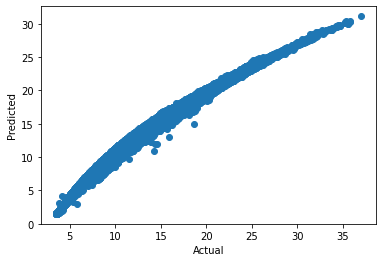

In [120]:
#Create a scatterplot that shows actual versus predicted values for the T_degC]
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Part D: Using sklearn API

In [109]:
#Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train.
#Print out the coefficients (including the intercept)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(35.693482527578254, array([ 3.10912414, -5.03783769]))

In [121]:
#Predict T_degC for the test data using the fitted values in b.
y_pred_sklearn=lin_reg.predict(X_new)
y_pred_sklearn

array([ 7.15757532,  7.86502288, 10.18487419, ...,  7.11476435,
        7.76832384,  7.99231798])

In [122]:
# Calculate the following for the test data:
# mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_sklearn)

0.23390146504373413

In [123]:
#r-squared
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_sklearn)

0.9868711116161912

In [124]:
#explained variance
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred_sklearn)

0.9868711253672072

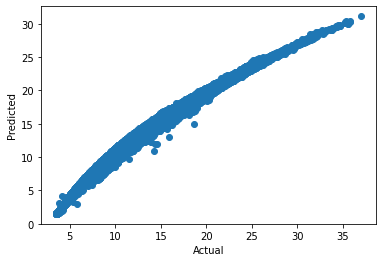

In [125]:
#Create a scatterplot that shows actual versus predicted values for the T_degC]
import matplotlib.pyplot as plt
plt.scatter(y_pred_sklearn,y_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Part E: Conceptual Questions

#### 1. Why is it important to have a test set?
##### The point of a test set is to give a final, unbiased performance measure of your entire model building process.

#### 2.If the normal equation always provides a solution, when would we not want to use it?
##### Not all the data are linear correlated 

#### 3.How might we improve the fit of our models from Part C & D?
##### Logarithms of all-positive variables, Standardizing based on the scale or potential range of the data

#### 4. As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff. 
##### Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.
##### Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.
##### If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias. So we need to find the right/good balance without overfitting and underfitting the data.
##### This tradeoff in complexity is why there is a tradeoff between bias and variance. An algorithm can’t be more complex and less complex at the same time.
##### To build a good model, we need to find a good balance between bias and variance such that it minimizes the total error.

#### 5. In a linear regression model, how might we reduce bias?
##### Overfitting

#### 6. In a linear regression model, how might we reduce variance?
##### Underfitting